In [34]:
import cv2
import matplotlib.pyplot as plt
import numpy as np    

In [35]:
def detect_Low_contrast_image(image_path, contrast_threshold=10):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the standard deviation of pixel intensities
    std_dev = np.std(image)

    #value of std
    print(std_dev)

    # Check if standard deviation is below the threshold
    if std_dev < contrast_threshold:
        return True  
    else:
        return False  

# Test the function
image_path = "test cases/10 - wen el kontraastttt.jpg"
if detect_Low_contrast_image(image_path):
    print("The image is low contrast.")
else:
    print("The image has sufficient contrast.")


1.7948836100833006
The image is low contrast.


In [36]:
def plot_intensity_histogram(image_path):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise ValueError("Image not found or unable to load.")

    # Calculate the histogram
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.title("Grayscale Intensity Histogram")
    plt.xlabel("Pixel Intensity (0-255)")
    plt.ylabel("Frequency")
    plt.bar(bin_edges[:-1], histogram, width=1, color="gray", edgecolor="black")
    plt.xlim([0, 255])
    plt.show()

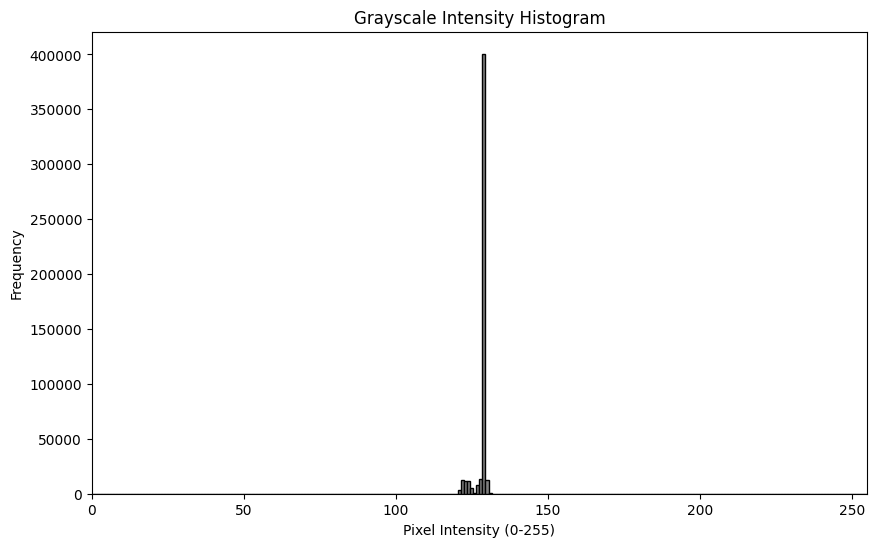

In [37]:
plot_intensity_histogram(image_path)

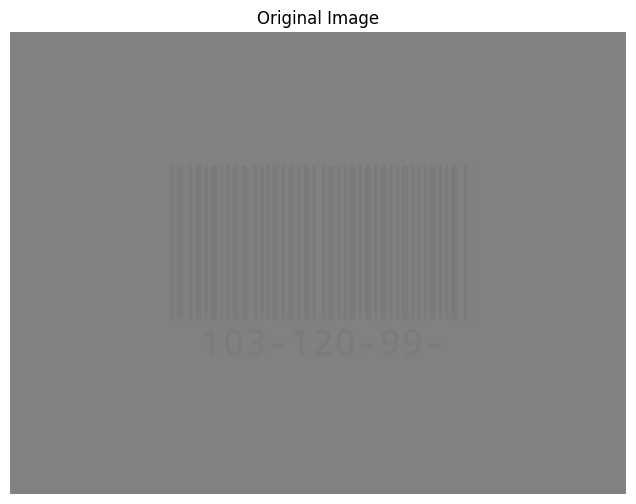

In [38]:
image_ = "test cases/10 - wen el kontraastttt.jpg"
image_ = cv2.imread(image_)

plt.figure(figsize=(10, 6))
plt.title("Original Image")
plt.imshow(image_)
plt.axis('off')  
plt.show()

